# <center>Descriptive Statistics</center>


In [44]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Dataset

In [5]:
height = [170, 165, 155, 175, 66, 45, 22, 45, 67, 12, 334, 567, 34, 567, 334, 12, 13, 14, 145, 16, 19, 90, 9, 87, 65, 43, 23, 46, 9, 7]
weight = [58, 52, 63, 33, 34, 55, 67, 888, 232, 233, 18, 89, 67, 777, 78, 87, 123, 213, 124, 656, 345, 345, 345, 345, 34, 34, 24, 24, 23, 12]

classification = [''] * len(weight)  # Initializing classification list

for i in range(len(weight)):
    if weight[i] > 150:
        classification[i] = "Animal"
    else:
        classification[i] = "Human"

In [42]:
data = {
    'height':height,
    'weight':weight,
    'classification':classification
}
df=pd.DataFrame(data)
print(df)

    height  weight classification
0      170      58          Human
1      165      52          Human
2      155      63          Human
3      175      33          Human
4       66      34          Human
5       45      55          Human
6       22      67          Human
7       45     888         Animal
8       67     232         Animal
9       12     233         Animal
10     334      18          Human
11     567      89          Human
12      34      67          Human
13     567     777         Animal
14     334      78          Human
15      12      87          Human
16      13     123          Human
17      14     213         Animal
18     145     124          Human
19      16     656         Animal
20      19     345         Animal
21      90     345         Animal
22       9     345         Animal
23      87     345         Animal
24      65      34          Human
25      43      34          Human
26      23      24          Human
27      46      24          Human
28       9    

In [7]:
#absolute mean deviation
mean_dev_hei=np.mean(np.abs(height-np.mean(height)))
mean_dev_wei=np.mean(np.abs(weight-np.mean(weight)))
print("Absolute Mean Deviation for height:",mean_dev_hei)
print("Absolute Mean Devaiaion for weight:",mean_dev_wei)

Absolute Mean Deviation for height: 107.01333333333335
Absolute Mean Devaiaion for weight: 170.20000000000007


In [8]:
#Standard Deviation
std_dev_hei=np.std(height)
std_dev_wei=np.std(weight)
print("Standard Deviation for Height:",std_dev_hei)
print("Standard Deviation for Weight:",std_dev_wei)

Standard Deviation for Height: 148.64605238245946
Standard Deviation for Weight: 226.03341935799375


# Frequency distribution

In [11]:
freq_dis = df['classification'].value_counts()
print("Frequency Distribution:",freq_dis)

Frequency Distribution: classification
Human     20
Animal    10
Name: count, dtype: int64


# Find Percentile

In [17]:
percentile_height=df.groupby('classification')['height'].quantile([0.5,0.50,0.75])
percentile_weight = df.groupby('classification')['weight'].quantile([0.25, 0.50, 0.75])
print("Percentile of Weight:",percentile_weight)
print("Percentile Height: ",percentile_height)

Percentile of Weight: classification      
Animal          0.25    261.00
                0.50    345.00
                0.75    578.25
Human           0.25     30.75
                0.50     53.50
                0.75     69.75
Name: weight, dtype: float64
Percentile Height:  classification      
Animal          0.50     32.00
                0.50     32.00
                0.75     82.00
Human           0.50     55.50
                0.50     55.50
                0.75    166.25
Name: height, dtype: float64


In [19]:
quartiles_height = df.groupby('classification')['height'].quantile([0.25, 0.75])
quartiles_weight = df.groupby('classification')['weight'].quantile([0.25, 0.75])
print("\nHeight Quartiles:")
print(quartiles_height)
print("\nWeight Quartiles:")
print(quartiles_weight)



Height Quartiles:
classification      
Animal          0.25     14.50
                0.75     82.00
Human           0.25     22.75
                0.75    166.25
Name: height, dtype: float64

Weight Quartiles:
classification      
Animal          0.25    261.00
                0.75    578.25
Human           0.25     30.75
                0.75     69.75
Name: weight, dtype: float64


# Correlation and Covariance

### Correlation

In [24]:
numerical_data = df[['height','weight']]
correlation_matrix=numerical_data.corr()
print("Correlation Matrix: ")
print(correlation_matrix)

Correlation Matrix: 
          height    weight
height  1.000000  0.120516
weight  0.120516  1.000000


### Covariance

In [25]:
covariance_matrix=numerical_data.cov()
print("\n Covariance Matrix:")
print(covariance_matrix)


 Covariance Matrix:
              height        weight
height  22857.567816   4188.841379
weight   4188.841379  52852.868966


# Data Visualization Techniques

## Scatter Plot

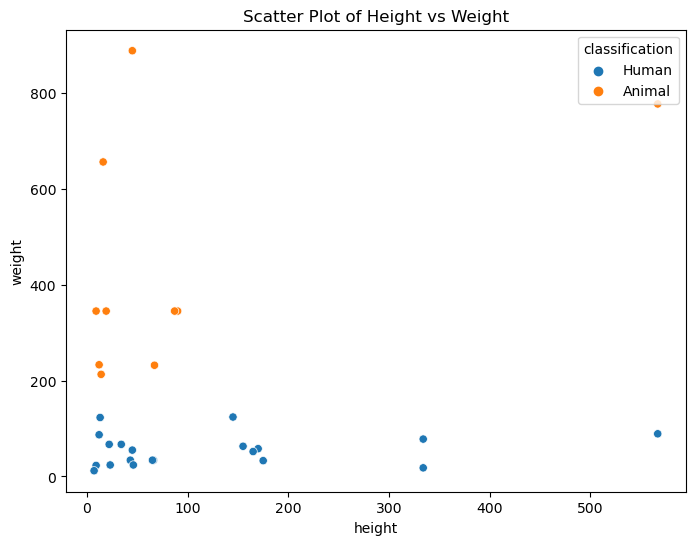

In [30]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='height',y='weight',data=df,hue='classification')
plt.title('Scatter Plot of Height vs Weight')
plt.xlabel('height')
plt.ylabel('weight')
plt.show()

## Boxplot

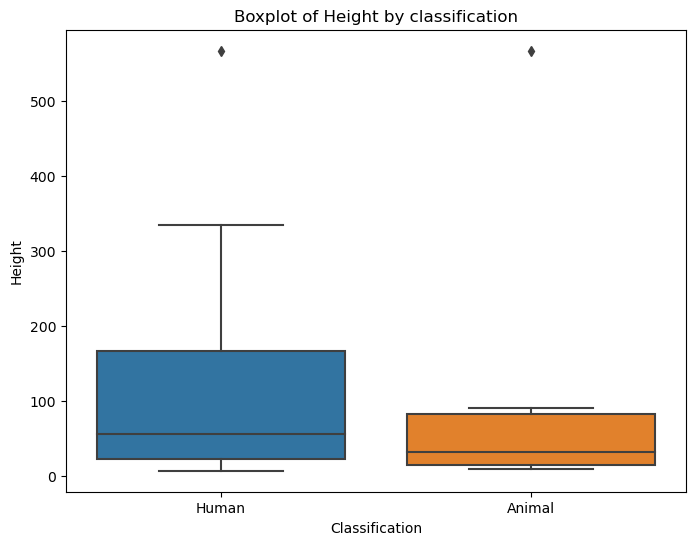

In [38]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='classification', y='height', data=df)
plt.title('Boxplot of Height by classification')
plt.xlabel('Classification')
plt.ylabel('Height')
plt.show()

## Violin Plot

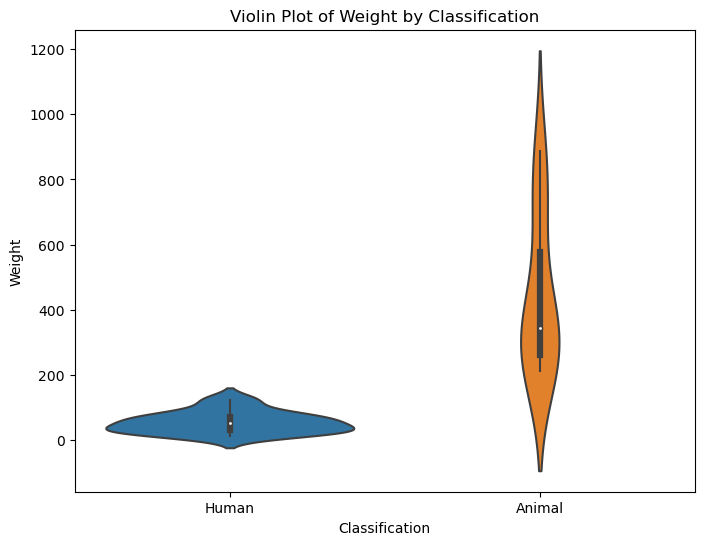

In [39]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='classification', y='weight', data=df)
plt.title('Violin Plot of Weight by Classification')
plt.xlabel('Classification')
plt.ylabel('Weight')
plt.show()


# Skewness

In [45]:
skewness_height=skew(df['height'])
skewness_weight=skew(df['weight'])
print("Skewness of Height:",skewness_height)
print("Skewness of weight:",skewness_weight)

Skewness of Height: 2.0182207403940566
Skewness of weight: 1.834489864942929


# Kurtosis

In [46]:
kurtosis_height=kurtosis(df['height'])
kurtosis_weight=kurtosis(df['weight'])
print("Kurtosis of Height:",kurtosis_height)
print("Kurtosis of Weight",kurtosis_weight)

Kurtosis of Height: 3.2730323349090042
Kurtosis of Weight 2.5238319654362007


### Data Cleaning and Handling Missing Values

In [47]:
print("Missing Values:")
print(df.isnull().sum())
df_cleaned=df.dropna()
print(df_cleaned)

Missing Values:
height            0
weight            0
classification    0
dtype: int64
    height  weight classification
0      170      58          Human
1      165      52          Human
2      155      63          Human
3      175      33          Human
4       66      34          Human
5       45      55          Human
6       22      67          Human
7       45     888         Animal
8       67     232         Animal
9       12     233         Animal
10     334      18          Human
11     567      89          Human
12      34      67          Human
13     567     777         Animal
14     334      78          Human
15      12      87          Human
16      13     123          Human
17      14     213         Animal
18     145     124          Human
19      16     656         Animal
20      19     345         Animal
21      90     345         Animal
22       9     345         Animal
23      87     345         Animal
24      65      34          Human
25      43      34         